# Capstone Project -  Detecting types of vehicles on Singapore roads with Object Detection models to aid in road maintenance planning.

## Background 
In Singapore, there are about 1 million vehicles that is on our road network of more than 9,000 lane-kilometres which constitutes up to 12% of our land and road maintenance is currently maintained by Land Transport Authority (LTA). It has been known that roads, and means of transport, make a crucial contribution to economic development and growth and bring important social benefits, which is extremely important for Singapore.

## Problem Statement
In view of the periodic maintenance regime that includes periodic road inspections and surveys that were planned by LTA, we could also leverage AI related technology to better assist LTA in their road maintenance regime. As such, I had developed a vehicle recognition model through the use of AI object detection techniques to aid in detecting and classifying the number of vehicle types traveled on Singapore roads across various time periods of the day, which could potentially supplement as an additional source of information for planning road maintenance regime.

## Approach 
Traffic images were scraped on 20 March 2021 from 0000 to 2359 hours periodic at 1 minute intervals via Data.gov.sg. With this images, annotating was done with the use of Makesense.ai, a free annotating tool that runs on web browser without the need for any installation. 100 traffic images with 50 of them belonging to the time period from between 6AM to 10AM and the other remaining 50 belonging to the time period from 6PM to 10PM were picked

# Analysis with YOLO framework

Summary of model performance

**Using the best weights:**

|Model|Iterations|Resize resolution|with COCO weights|Validation MAP(%)|Bike AP(%)|Bus AP(%)|Car AP(%)|Lorry/Truck AP(%)|Van AP(%)|Number with predictions (out of 516)|learning rate|
|---|---|---|---|---|---|---|---|---|---|---|---|
|v3-5l|10000|416X416|Yes|36.11|52.88|23.6|51.79|33.81|18.47|446|0.001|
|Scaled YOLOv4|10000|512X512|Yes|43.09|59.19|35.23|60.67|36.17|24.18|494|0.001|
|v4|10000|480x480|Yes|48.14|61.56|47.7|61.86|41.48|28.1|489|0.001|
|v4|10000|416x416|Yes|48.02|69.85|42.59|61.11|39.24|27.3|501|0.001|
|v4|10000|416X416|No|42.07|58.46|39.02|58.85|31.93|22.09|504|0.001|
|v4|10000|416X416|No|43.07|63.8|35.45|59.87|33.34|22.89|481|0.01|
|v4|10000|384X384|No|41.91|61.52|31.14|58.87|37.1|20.93|482|0.001|
|v4|10000|448X448|No|40.44|61.29|29.26|58.15|32.83|20.68|480|0.001|

## Some problems of model

In [18]:
import cv2,os 
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
image_path_example1 = os.path.join(os.getcwd(), "sample_output.png")
image_path_example2 = os.path.join(os.getcwd(), "sample_output2.png")
image_path_example3 = os.path.join(os.getcwd(), "sample_output3.png")

In [19]:
img_sample1 = Image.open(image_path_example1)
img_sample2 = Image.open(image_path_example2)
img_sample3 = Image.open(image_path_example3)

### Case of extra detection and missing detection 

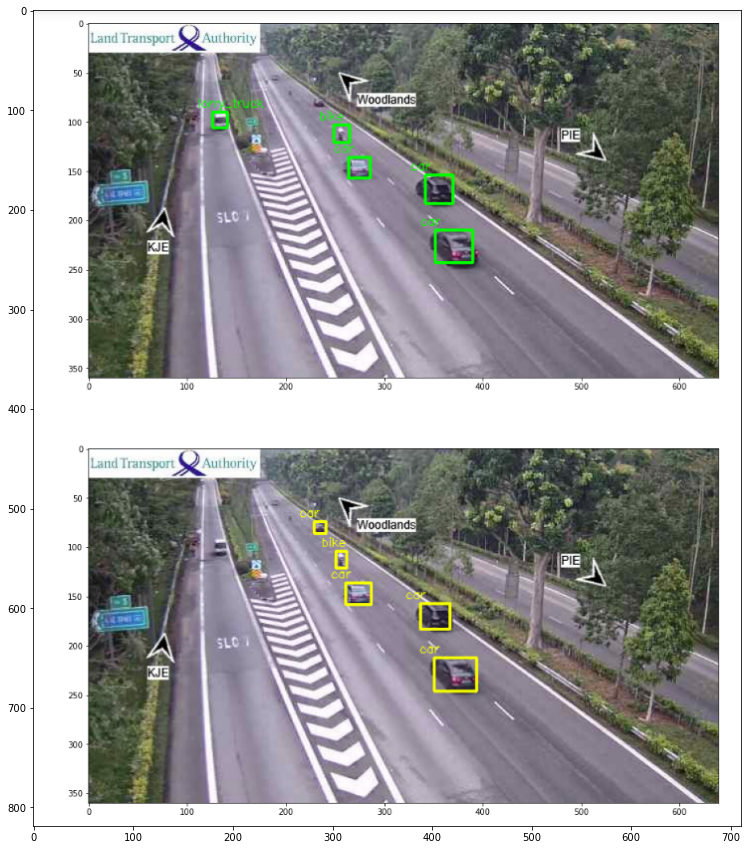

In [20]:

plt.figure(figsize = (15,15))
imshow(img_sample1);

### Case of missing detections

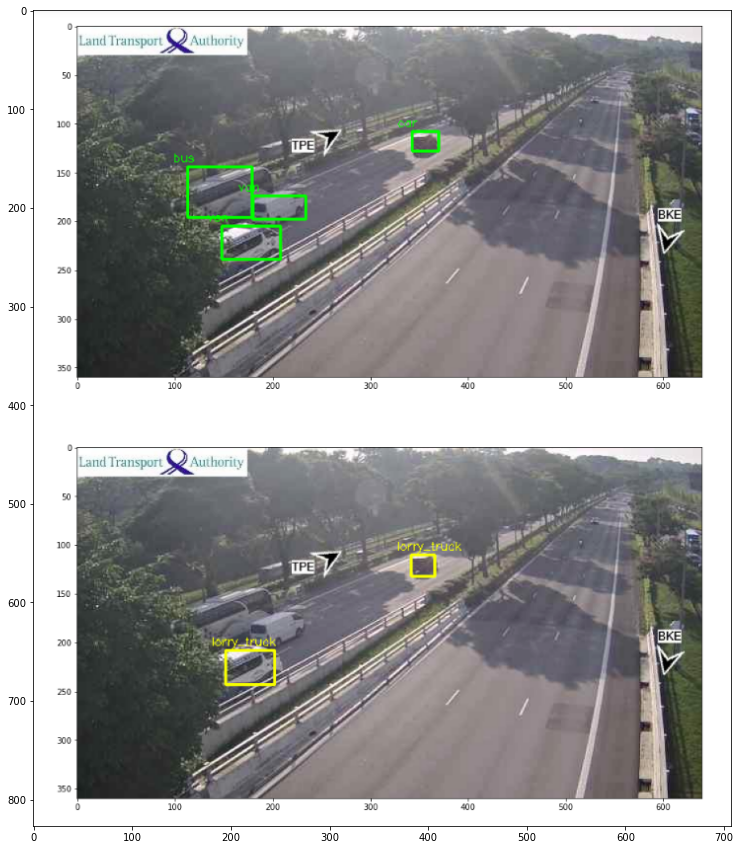

In [21]:
plt.figure(figsize = (15,15))
imshow(img_sample2);

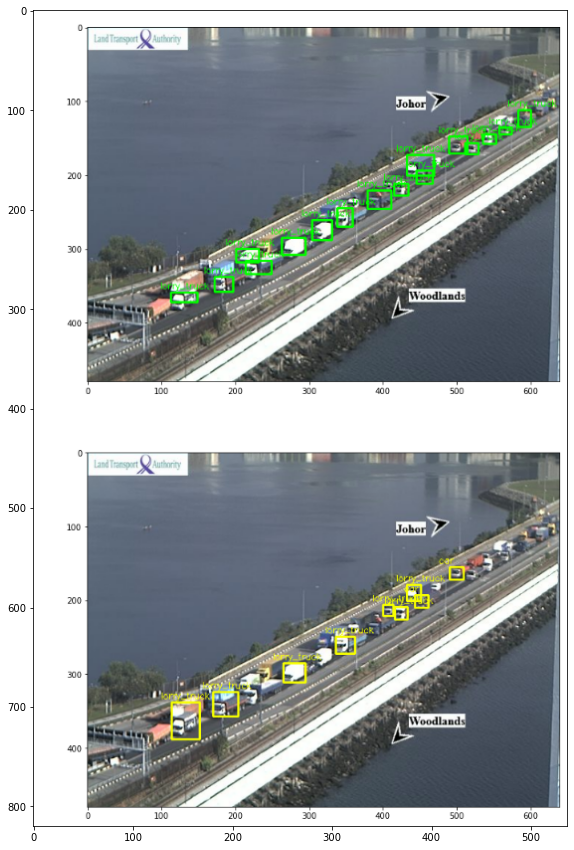

In [22]:
plt.figure(figsize = (15,15))
imshow(img_sample3);

## Analysis

A best mean average precision of 48% was achieved using YOLOv4 model with default hyperparameter configuration and this value was calculated based on 501 validation images out of 516 validation image (97.1%) detection rate. 


In view of the large amount of unannotated data that could be used for training, I believe the inclusion of those data with corresponding annotations could potentially push the mean average precision above 50% when there is proper pre-processing as well as optimal hyperparameter tuning.

Some of the common problems with the model can be classified into 4 categories:

1. Detecting vehicles when there is none
2. Not detecting vehicles when there is
3. Missed Detections
4. Extra detections

What we see from above are cases 3 and 4. For case 1, we would be able to detect such case in images if we set the threshold of IOU to be 0, otherwise, very seldom we should expect to see that case with high confidence. However, for case 2, from the other notebooks in darknet/backup folder that were executed, we do see that there are some images which the model failed to detect for vehicles.

For our use case, it would be preferrable to have a model that is more sensitive to detecting objects as we expect vehicles to be on the road everyday.
